#  Linear Regression with Python Scikit Learn  

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

# Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline

In [2]:
df=pd.read_csv("http://bit.ly/w-data")

In [4]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
#checking null values

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:**

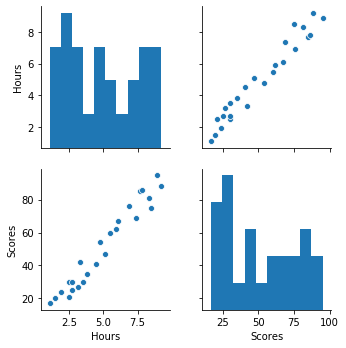

In [7]:
sns.pairplot(df)
corr_matrix = df.corr()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

In [10]:
X= df.drop(columns = ['Scores'])
Y= df['Scores']
X.shape
Y.shape
X = np.array(X)
Y = np.array(Y)
Y=Y.reshape(-1,1)

In [11]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

**Preparing the Data**

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

**Training the Algorithm**

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
Y_predict = LinearRegression_model.predict(X_test)
Y_predict 

array([[12.46019587],
       [59.50663644],
       [48.72516047],
       [83.02985672],
       [20.3012693 ],
       [28.14234273],
       [88.91066179]])

**Visualizing the train set results** 

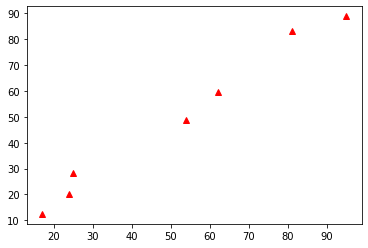

In [37]:
plt.plot(Y_test, Y_predict, '^', color = 'r')

**Simple Linear Regression: Linear Regression models are used to show or predict the relationship between two variables or factors. The factor that is being predicted (the factor that the equation solves for) is called the dependent variable. The factors that are used to predict the value of the dependent variable are called the independent variables.**

**In linear regression, each observation consists of two values. One value is for the dependent variable and one value is for the independent variable. In this simple model, a straight line approximates the relationship between the dependent variable and the independent variable.**

**When two or more independent variables are used in regression analysis, the model is no longer a simple linear one. This is known as multiple regression**

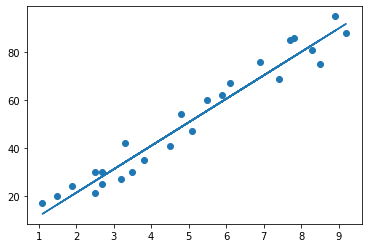

In [38]:
# Plotting the regression line
line = LinearRegression_model.coef_*X+LinearRegression_model.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

**Making Predictions**

In [39]:
# Comparing Actual vs Predicted
df_i = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_predict.flatten()})  
df_i 

,Actual,Predicted
0,17,12.460196
1,62,59.506636
2,54,48.725160
3,81,83.029857
4,24,20.301269
5,25,28.142343
6,95,88.910662


In [40]:
# You can also test with your own data
hours = [[9.25]]
own_pred = LinearRegression_model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = [92.34113141]


In [41]:
Y_pred = LinearRegression_model.predict([[9.25]])

**Evaluating the Model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [42]:
k = X_test.shape[1]
n = len(X_test)
n
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(Y_test, Y_predict)), '3f'))
MSE = mean_squared_error(Y_test, Y_predict)
MAE = mean_absolute_error(Y_test, Y_predict)
r2 = r2_score(Y_test, Y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [43]:
print('RMSE -',RMSE, '\nMSE -',MSE, '\nMAE -',MAE, '\nR2 -',r2, '\nAdjusted R2 -',adj_r2)

RMSE - 4.130131 
MSE - 17.057985732149184 
MAE - 3.8954679385917346 
R2 - 0.9783953344480121 
Adjusted R2 - 0.9740744013376145
